In [1]:
from scipy.io import loadmat
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = loadmat('Amazon.mat')
labels = data_file['label'].flatten()
feat_data = data_file['features'].todense().A

In [3]:
# The first 3304 nodes are not labeled
count_labels = Counter(labels[3305:])
percentages = {k: v/len(labels[3305:]) for k, v in count_labels.items()}
print("Proportion of each class in the labeled data:")
print(f"\tClass 0: {percentages[0]:.2%}")
print(f"\tClass 1: {percentages[1]:.2%}")
print("Number of labeled nodes:", len(labels[3305:]))
print("Total number of nodes:", len(labels))
print("Number of features:", feat_data.shape[1])

Proportion of each class in the labeled data:
	Class 0: 90.50%
	Class 1: 9.50%
Number of labeled nodes: 8639
Total number of nodes: 11944
Number of features: 25


In [4]:
print('Number of nodes:', len(labels))

Number of nodes: 11944


In [5]:
with open('amz_homo_adjlists.pickle', 'rb') as file:
    homo = pickle.load(file)
file.close()

In [6]:
list_edges = []
for i in range(len(labels)):
    list_edges.append(len(homo[i]))

print(f"Average number of edges per node: {np.mean(list_edges):.4}")
print(f"Median number of edges per node: {np.median(list_edges)}")

Average number of edges per node: 737.5
Median number of edges per node: 400.0


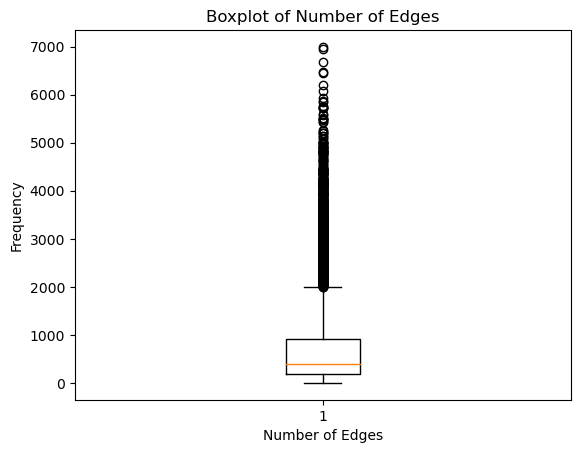

In [7]:
plt.boxplot(list_edges)
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Edges')
plt.show()
